In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py 
import plotly.graph_objs as go
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('googleplaystore.csv')

In [3]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
data.shape

(10841, 13)

In [7]:
total=data.isnull().sum().sort_values(ascending=False)
percent=(data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data=pd.concat([total,percent],axis=1,keys=['Total','Percent'])
missing_data.head(6)

,Total,Percent
Rating,1474,0.135965
Current Ver,8,0.000738
Android Ver,3,0.000277
Type,1,0.000092
Content Rating,1,0.000092
App,0,0.000000


In [8]:
data.dropna(how='any',inplace=True)

In [9]:
data.shape

(9360, 13)

In [10]:
total=data.isnull().sum().sort_values(ascending=False)
percent=(data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data=pd.concat([total,percent],axis=1,keys=['Total','Percent'])
missing_data.head(6)

,Total,Percent
App,0,0.0
Category,0,0.0
Rating,0,0.0
Reviews,0,0.0
Size,0,0.0
Installs,0,0.0


Text(0.5, 1.0, 'Rating frequency')

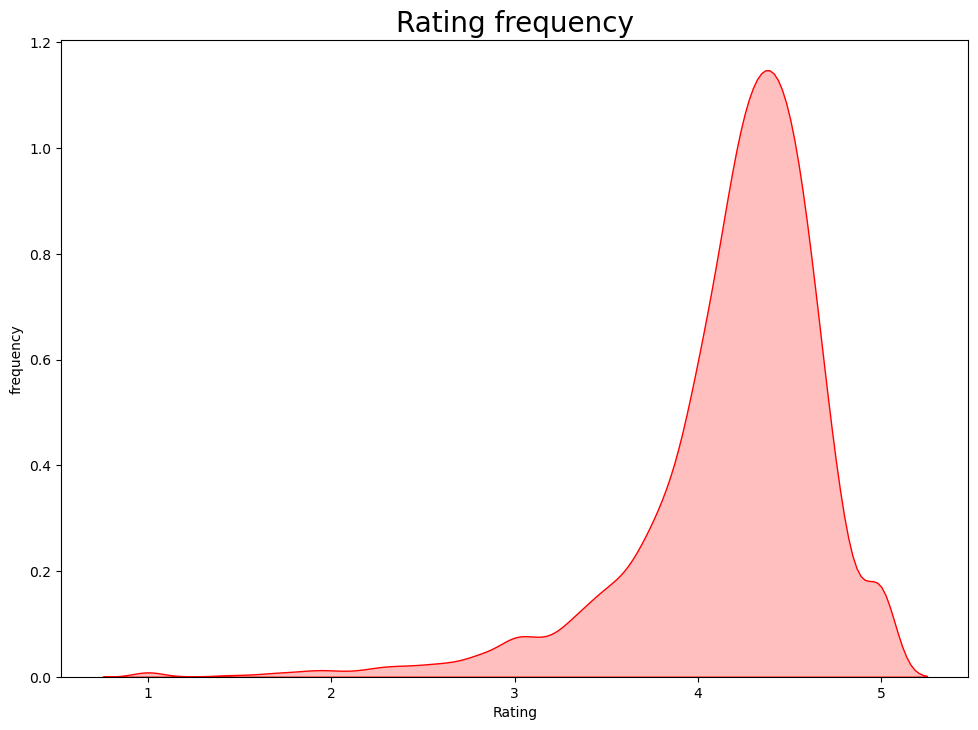

In [12]:
# Reytinq Frekansı üçün yaradılmış qrafik
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=11.7,8.27   # qrafik ölçüləri üçün 
g=sns.kdeplot(data.Rating,color='Red',shade=True)  # buradaki məlumatların qrafikdə əks olunması üçün.(qrafik rəngi və s.)
g.set_xlabel('Rating')
g.set_ylabel('frequency')
plt.title('Rating frequency', size=20)
# Qrafikdəndə gördüyümüz kimi 'play store' da olan tətbiqlər əsasən 4-5 qiymətləri aralığında dəyərləndirilib.

In [13]:
len(data['Category'].unique()),'categories'

(33, 'categories')

In [14]:
data['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

Text(0.5, 1.0, 'Category Ranking')

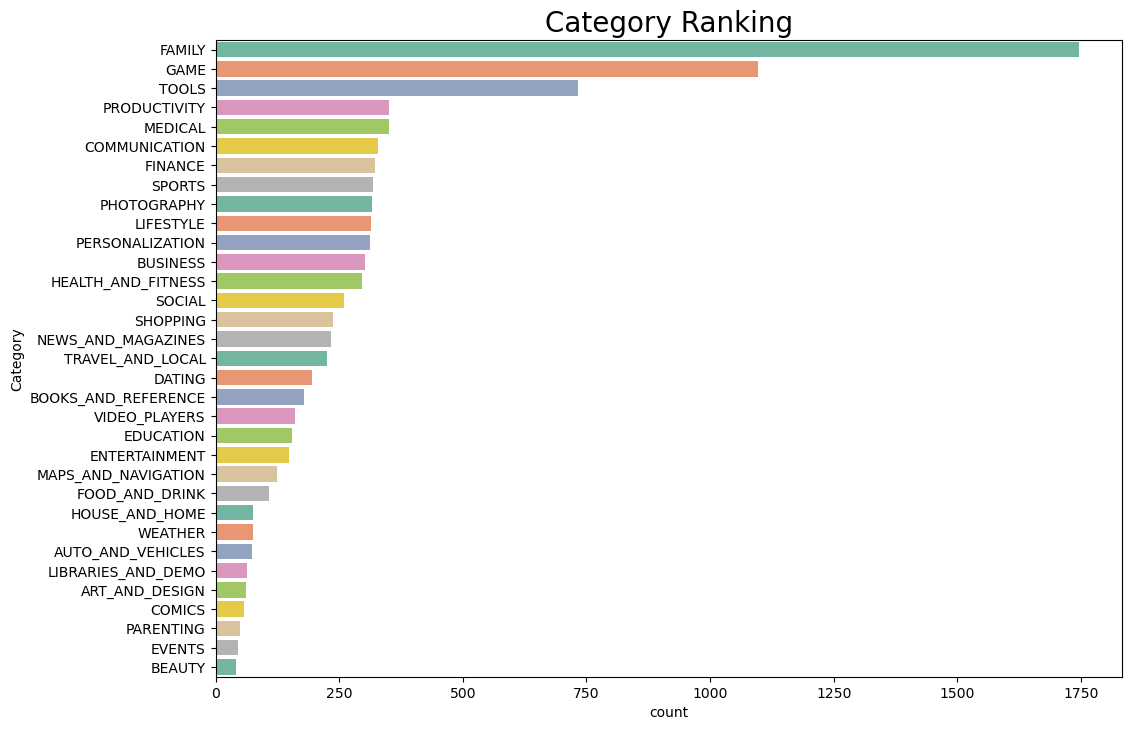

In [29]:
# g=sns.countplot(x='Category',data=data,palette='Set2')
# g.set_xticklabels(g.xticlabels(),rotation=90,ha='right')
# g
# plt.title('Category Ranking',size=20)

cat_num = data["Category"].value_counts()
sns.barplot(x = cat_num, y = cat_num.index, data = data,palette='Set2')
plt.title("Category Ranking", size=20)

# Kategoriyalar üzrə tətbiq saylarını göstərir. Ən çox tətbiq 'Family' kateqoriyasında mövcuddur. Bu bilgi nə üçün lazımdır? Bu bilgi ilə 
# mobil developerlər play store da populyar kateqoriyalar üzrə tətbiqlər hazırlayaraq daha çox görüntülənmə və daha çox 
# tətbiqin endirilməsinə nail olurlar.

Text(0.5, 1.0, 'Category Rating')

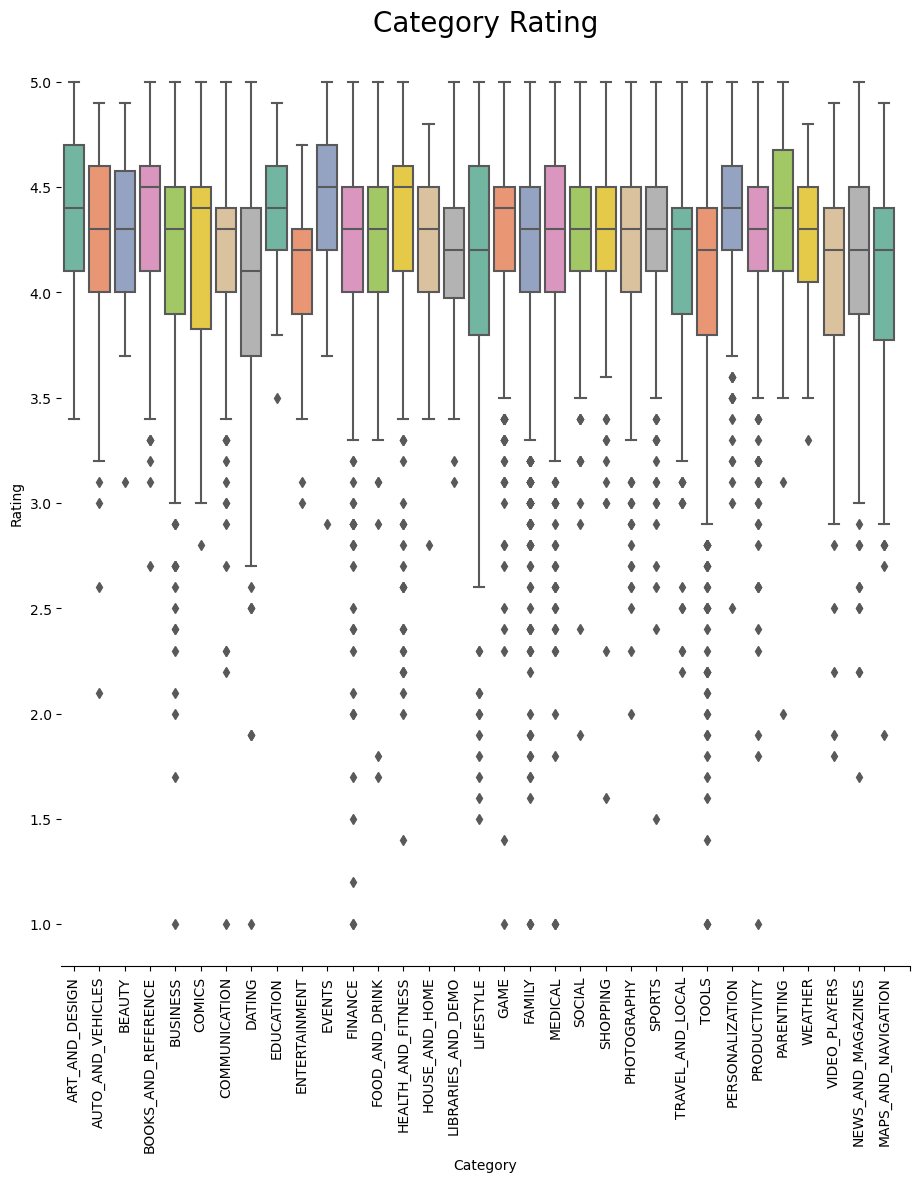

In [30]:
g=sns.catplot(x='Category',y='Rating',data=data,kind='box',height=10,palette='Set2')
g.despine(left=True)
g.set_xticklabels(rotation=90)
g.set(xticks=range(0,34))
g=g.set_xlabels('Category')
g=g.set_ylabels('Rating')
plt.title('Category Rating',size=20)

# Kateqoriyalar üzrə reytinq dəyərləndirmələri göstrilib. Burada baxsaq reytinqlər üzrə 
# ən aşağı performans "Dating" kateqoriyasındadır. Ən yüksək performans "Art and Design" kateqoriyasıdır.

In [32]:
data['Reviews'].head()

0       159
1       967
2     87510
3    215644
4       967
Name: Reviews, dtype: object

In [33]:
data['Reviews']=data['Reviews'].apply(lambda x: int(x))

In [34]:
data['Reviews'].head()

0       159
1       967
2     87510
3    215644
4       967
Name: Reviews, dtype: int64

In [40]:
# plt.rcParams['figure.figsize']=11.7,8.27   # qrafik ölçüləri üçün 
# g=sns.kdeplot(data.Reviews,color='Blue',shade=True)  # buradaki məlumatların qrafikdə əks olunması üçün.(qrafik rəngi və s.)
# g.set_xlabel('Reviews')
# g.set_ylabel('frequency')
# plt.title('Reviews frequency', size=20)

<Figure size 1500x1500 with 0 Axes>

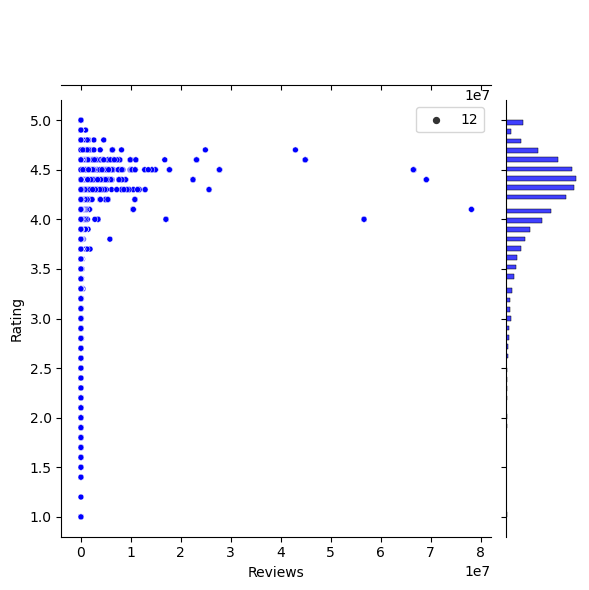

In [45]:
# YAZILAN RƏYLƏR ÜÇÜN QRAFİK
plt.figure(figsize=(15,15))
g=sns.jointplot(x='Reviews',y='Rating', color='Blue',data=data, size=12)
# Burada qrafik reytinqlərə əsasən rəy sayını ifadə edir. Burada görürük ki, rəy sayına uyğun olaraq reytinqlərdə dəyişir.

Text(0.5, 1.0, 'Rating Reviews')

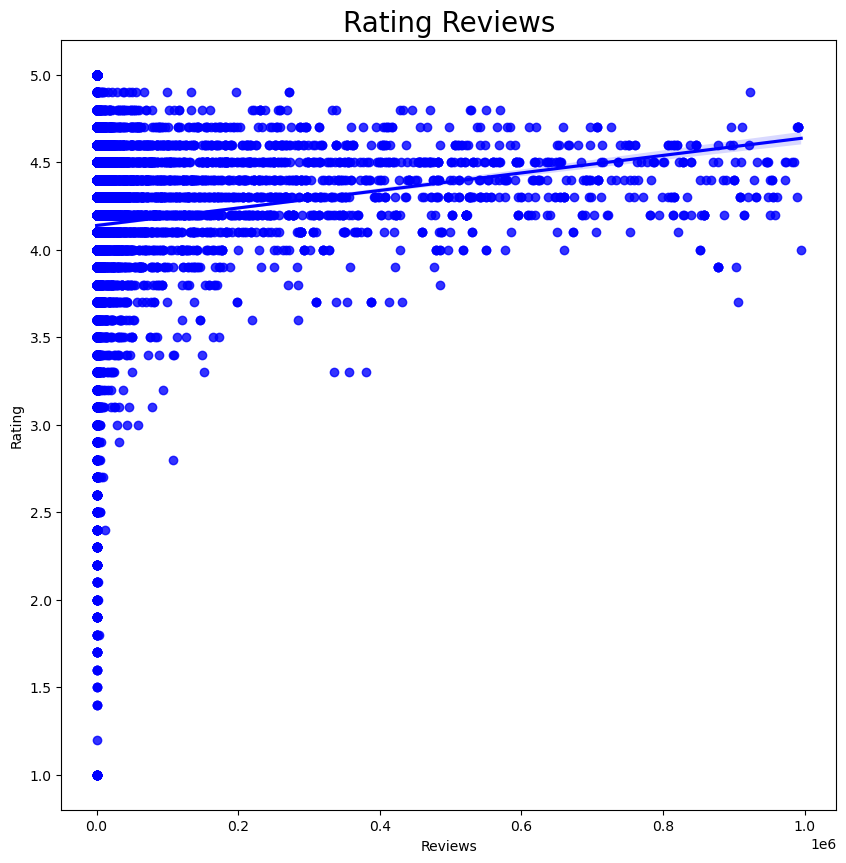

In [48]:
plt.figure(figsize=(10,10))
sns.regplot(x='Reviews',y='Rating', color='blue',data=data[data['Reviews']<1000000])
plt.title('Rating Reviews', size=20)
# Buradaki qrafik reytinq ilə baxış sayı arasında ki, əlaqəni göstərir. Yəni reytinq artdıqca baxış sayıda uyğun olaraq artır.
# Burada nəticələri daha dəqiq göstərmək üçün baxış sayının 1 milyona qədər olan hissəsini nəzərə alaraq qrafiki qurdum.
# Burada seçmə müşahidəsindən istifadə etmişəm.

In [49]:
data['Size'].head()

0     19M
1     14M
2    8.7M
3     25M
4    2.8M
Name: Size, dtype: object

In [50]:
data['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M', '11M',
       '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M', '26M',
       '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M', '5.7M',
       '8.6M', '2.4M', '27M', '2.7M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M',
       '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M',
       '42M', '9.1M', '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M',
       '3.7M', '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M',
      

In [55]:
# data['Size'].replace('Varies with device',np.nan.inplace=True)
data['Size'].replace('M','000000',regex=True, inplace=True)
data['Size'].replace('k','000',regex=True, inplace=True)

In [61]:
size_median = data[data['Size']!='Varies with device']['Size'].astype(float).median()
size_median

14000000.0

In [62]:
data['Size'].replace('Varies with device', size_median, inplace=True)

In [63]:
data.Size=pd.to_numeric(data.Size)

In [64]:
data['Size'].unique()

array([1.90e+07, 1.40e+07, 8.70e+00, 2.50e+07, 2.80e+00, 5.60e+00,
       2.90e+07, 3.30e+07, 3.10e+00, 2.80e+07, 1.20e+07, 2.00e+07,
       2.10e+07, 3.70e+07, 5.50e+00, 1.70e+07, 3.90e+07, 3.10e+07,
       4.20e+00, 2.30e+07, 6.00e+00, 6.10e+00, 4.60e+00, 9.20e+00,
       5.20e+00, 1.10e+07, 2.40e+07, 9.40e+00, 1.50e+07, 1.00e+07,
       1.20e+00, 2.60e+07, 8.00e+00, 7.90e+00, 5.60e+07, 5.70e+07,
       3.50e+07, 5.40e+07, 2.01e+05, 3.60e+00, 5.70e+00, 8.60e+00,
       2.40e+00, 2.70e+07, 2.70e+00, 2.50e+00, 7.00e+00, 1.60e+07,
       3.40e+00, 8.90e+00, 3.90e+00, 2.90e+00, 3.80e+07, 3.20e+07,
       5.40e+00, 1.80e+07, 1.10e+00, 2.20e+00, 4.50e+00, 9.80e+00,
       5.20e+07, 9.00e+00, 6.70e+00, 3.00e+07, 2.60e+00, 7.10e+00,
       2.20e+07, 6.40e+00, 3.20e+00, 8.20e+00, 4.90e+00, 9.50e+00,
       5.00e+00, 5.90e+00, 1.30e+07, 7.30e+07, 6.80e+00, 3.50e+00,
       4.00e+00, 2.30e+00, 2.10e+00, 4.20e+07, 9.10e+00, 5.50e+07,
       2.30e+04, 7.30e+00, 6.50e+00, 1.50e+00, 7.50e+00, 5.10e

In [65]:
data['Size'].fillna(data.groupby('Category')['Size'].transform('mean'),inplace=True)

Text(0.5, 1.0, 'Size frequency')

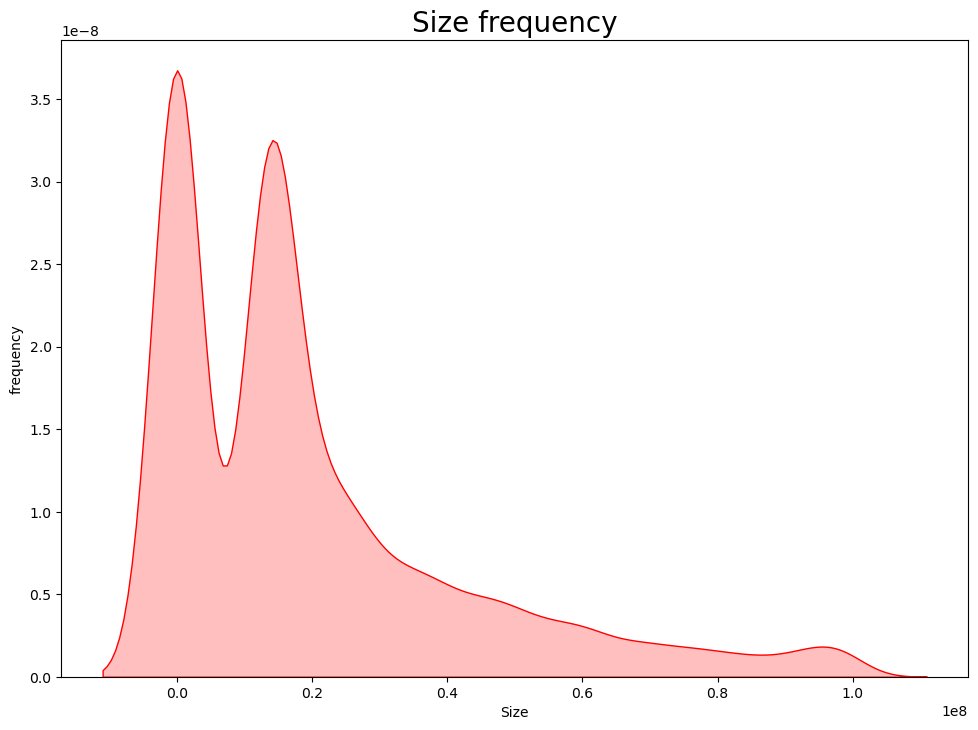

In [72]:
plt.rcParams['figure.figsize']=11.7,8.27   # qrafik ölçüləri üçün 
g=sns.kdeplot(data.Size,color='Red',shade=True)  # buradaki məlumatların qrafikdə əks olunması üçün.(qrafik rəngi və s.)
g.set_xlabel('Size')
g.set_ylabel('frequency')
plt.title('Size frequency', size=20)
# Bu qrafikdə görünür ki, kiçik ölçülü tətbiqlərin sayı daha çoxdur.

In [73]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [74]:
data['Installs'].head()

0        10,000+
1       500,000+
2     5,000,000+
3    50,000,000+
4       100,000+
Name: Installs, dtype: object

In [75]:
data['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '100+', '500+', '10+',
       '5+', '50+', '1+'], dtype=object)

In [76]:
data.Installs=data.Installs.apply(lambda x:x.replace('+',''))
data.Installs=data.Installs.apply(lambda x:x.replace(',',''))
data.Installs=data.Installs.apply(lambda x:int(x))

In [77]:
data['Installs'].unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,        100,        500,
               10,          5,         50,          1], dtype=int64)

In [78]:
data['Installs'].head()

0       10000
1      500000
2     5000000
3    50000000
4      100000
Name: Installs, dtype: int64

In [81]:
sorted_value = sorted(list(data['Installs'].unique()))
sorted_value
# Burada "İnstalls" dəyərlərini artan sıra ilə düzdüm.

[1,
 5,
 10,
 50,
 100,
 500,
 1000,
 5000,
 10000,
 50000,
 100000,
 500000,
 1000000,
 5000000,
 10000000,
 50000000,
 100000000,
 500000000,
 1000000000]

Text(0.5, 1.0, 'Rating vs Installs')

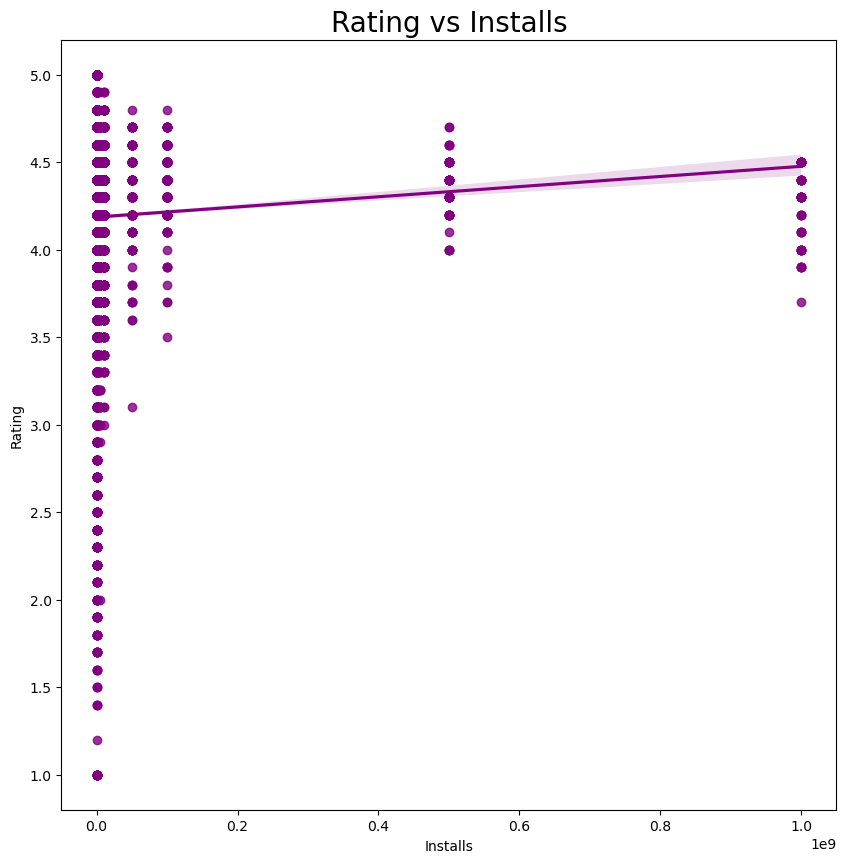

In [89]:
plt.figure(figsize=(10,10))
sns.regplot(x='Installs',y='Rating', color='Purple',data=data)
plt.title('Rating vs Installs', size=20)
# Bu qrafikdə yüklənmə sayları ilə reytinq arasındaki əlaqə verilib. Yüklənmə sayları artdıqca reytinq artıb.

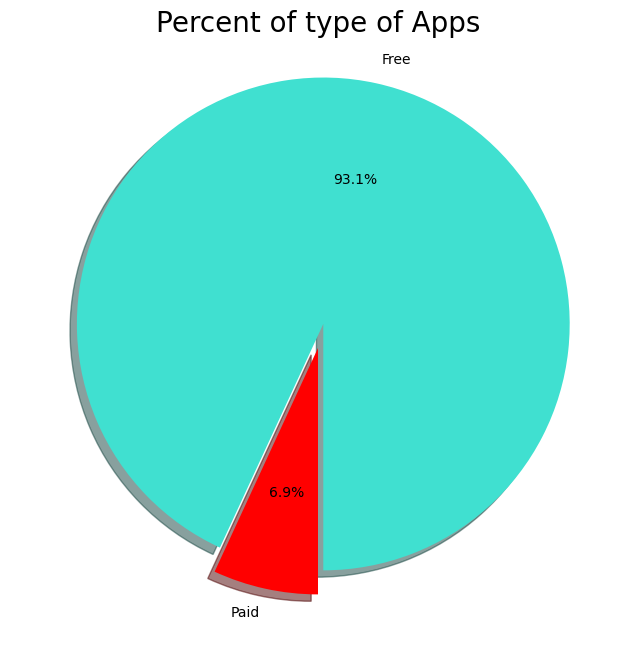

In [93]:
labels=data['Type'].value_counts(sort=True).index
sizes=data['Type'].value_counts(sort=True)
colors=['Turquoise','red']
explode=(0.1,0)
plt.rcParams['figure.figsize'] = 8,8
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%' , shadow=True, startangle=270,)
plt.title('Percent of type of Apps', size=20)
plt.show()
# Tətbiqlərin pullu yada pulsuz olmasının faiz nisbətini göstərir.

In [94]:
data['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$7.99', '$5.99', '$2.99', '$3.49',
       '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49', '$10.00',
       '$24.99', '$11.99', '$79.99', '$16.99', '$14.99', '$29.99',
       '$12.99', '$2.49', '$10.99', '$1.50', '$19.99', '$15.99', '$33.99',
       '$39.99', '$3.95', '$4.49', '$1.70', '$8.99', '$1.49', '$3.88',
       '$399.99', '$17.99', '$400.00', '$3.02', '$1.76', '$4.84', '$4.77',
       '$1.61', '$2.50', '$1.59', '$6.49', '$1.29', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$8.49', '$1.75', '$14.00', '$2.00',
       '$3.08', '$2.59', '$19.40', '$3.90', '$4.59', '$15.46', '$3.04',
       '$13.99', '$4.29', '$3.28', '$4.60', '$1.00', '$2.95', '$2.90',
       '$1.97', '$2.56', '$1.20'], dtype=object)

In [95]:
data.Price=data.Price.apply(lambda x:x.replace('$',''))
data.Price=data.Price.apply(lambda x:float(x))

In [96]:
data['Price'].unique()

array([  0.  ,   4.99,   3.99,   6.99,   7.99,   5.99,   2.99,   3.49,
         1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,  24.99,
        11.99,  79.99,  16.99,  14.99,  29.99,  12.99,   2.49,  10.99,
         1.5 ,  19.99,  15.99,  33.99,  39.99,   3.95,   4.49,   1.7 ,
         8.99,   1.49,   3.88, 399.99,  17.99, 400.  ,   3.02,   1.76,
         4.84,   4.77,   1.61,   2.5 ,   1.59,   6.49,   1.29, 299.99,
       379.99,  37.99,  18.99, 389.99,   8.49,   1.75,  14.  ,   2.  ,
         3.08,   2.59,  19.4 ,   3.9 ,   4.59,  15.46,   3.04,  13.99,
         4.29,   3.28,   4.6 ,   1.  ,   2.95,   2.9 ,   1.97,   2.56,
         1.2 ])

Text(0.5, 1.0, 'Rating vs Price')

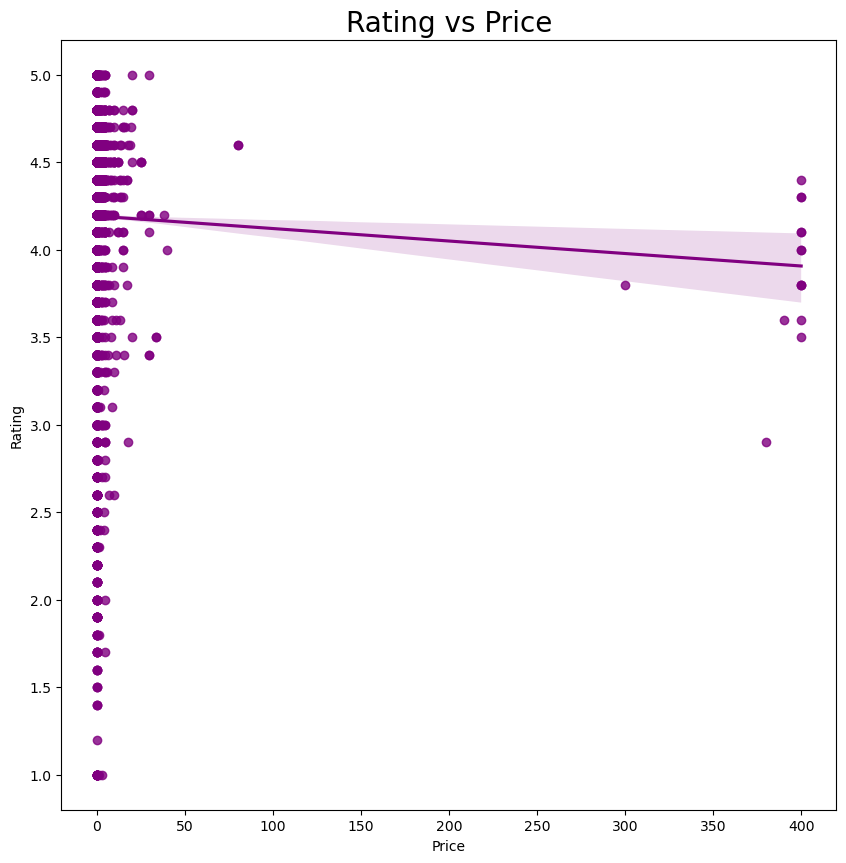

In [97]:
plt.figure(figsize=(10,10))
sns.regplot(x='Price',y='Rating', color='Purple',data=data)
plt.title('Rating vs Price', size=20)
# Burada Reytinq və qiymət arasında ki, əlaqə verilib. Yəni ki, qiymət artdıqca reytinq enib.

In [99]:
data.loc[data['Price'] ==0, 'PriceBand']= 'Ödənişsiz'
data.loc[(data['Price'] >0) & (data['Price']<=0.99), 'PriceBand'] = '1 ucuz'
data.loc[(data['Price'] >0.99) & (data['Price']<=2.99), 'PriceBand'] = '2 ucuz deyil'
data.loc[(data['Price'] >2.99) & (data['Price']<=4.99), 'PriceBand'] = '3 normal'
data.loc[(data['Price'] >4.99) & (data['Price']<=14.99), 'PriceBand'] = '4 nisbətən bahalı'
data.loc[(data['Price'] >14.99) & (data['Price']<=29.99), 'PriceBand'] = '5 bahalı'
data.loc[(data['Price'] >29.99), 'PriceBand'] = '6 çox bahalı'


In [102]:
data[['PriceBand', 'Rating']].groupby(['PriceBand'],as_index=False).mean()

,PriceBand,Rating
0,1 ucuz,4.300943
1,2 ucuz deyil,4.292975
2,3 normal,4.250318
3,4 nisbətən bahalı,4.269149
4,5 bahalı,4.252000
5,6 çox bahalı,3.923810
6,Ödənişsiz,4.186288


Text(0.5, 1.0, 'Boxen plot Rating Vs PriceBand')

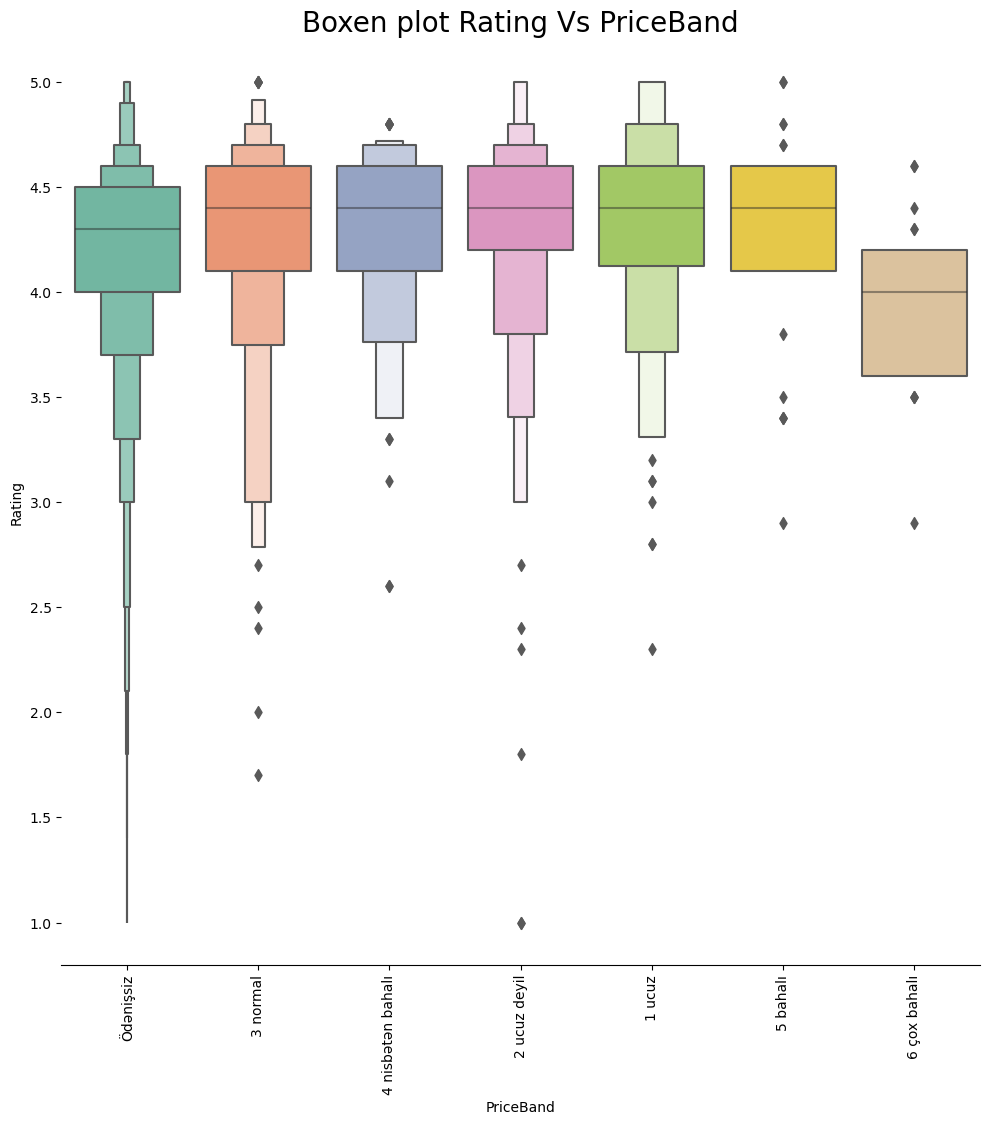

In [141]:
g=sns.catplot(x='PriceBand',y='Rating',data=data, kind='boxen', height=10,palette='Set2')
g.despine(left=True)
g.set_xticklabels(rotation=90)
g=g.set_ylabels('Rating')
plt.title('Boxen plot Rating Vs PriceBand', size=20)

# sns.scatterplot(x = "PriceBand", y = "Rating", data = data)
# plt.title("The content rating & rating", size=20)

# Yuxarıda düzəltdiyim cədvəli qrafik şəklində göstərdim. ucuzdan - çox bahalıya doğru ratinq sıralaması öz əksini tapıb.

<Axes: xlabel='Price', ylabel='Category'>

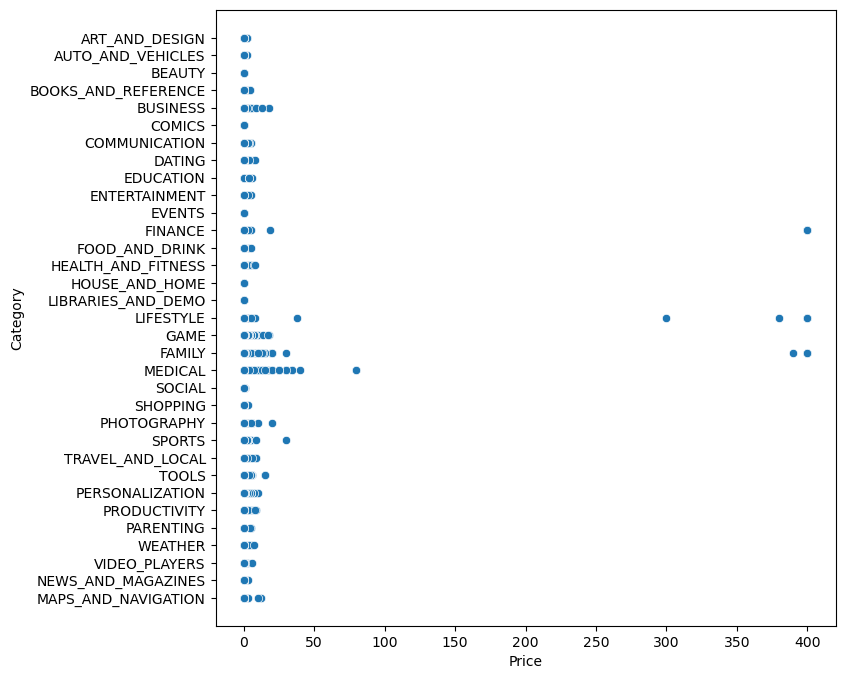

In [113]:
sns.scatterplot(data=data, y='Category', x='Price')
# Bu qrafikdə hansı kateqoriyaların tətbiqlərinə daha çox pul xərcləndiyini görürük.

In [106]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,PriceBand
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,Ödənişsiz
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,Ödənişsiz
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,Ödənişsiz
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,Ödənişsiz
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,Ödənişsiz


In [107]:
data['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [108]:
data=data[data['Content Rating']!='Unrated']

In [110]:
data['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+'], dtype=object)

Text(0.5, 1.0, 'The content rating & rating')

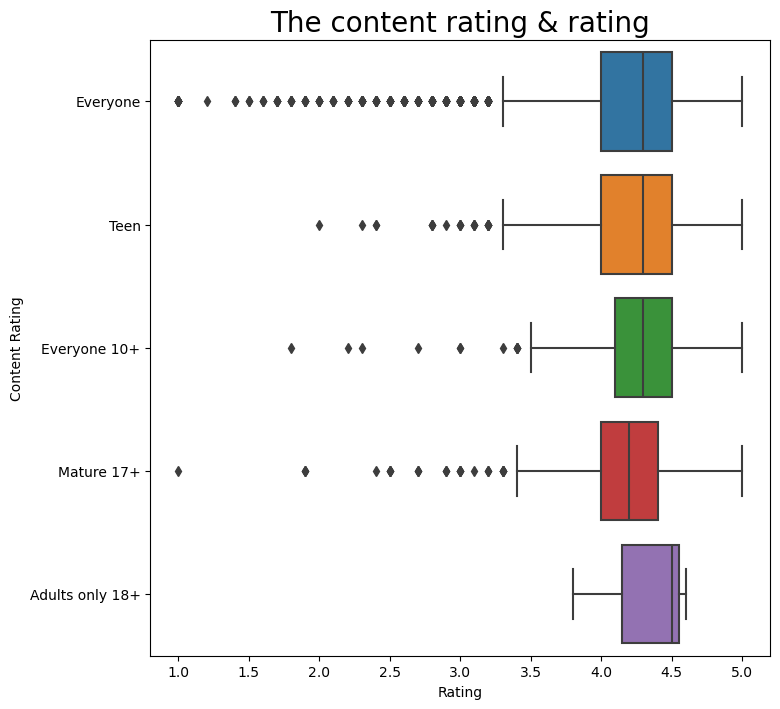

In [121]:
sns.boxplot(y = "Content Rating", x = "Rating", data = data)
plt.title("The content rating & rating", size=20)

In [146]:
data['Last Updated'].head()

0     January 7, 2018
1    January 15, 2018
2      August 1, 2018
3        June 8, 2018
4       June 20, 2018
Name: Last Updated, dtype: object

In [147]:
data['Last Updated']=pd.to_datetime(data['Last Updated'])

Text(0.5, 1.0, 'Last Updated vs Rating')

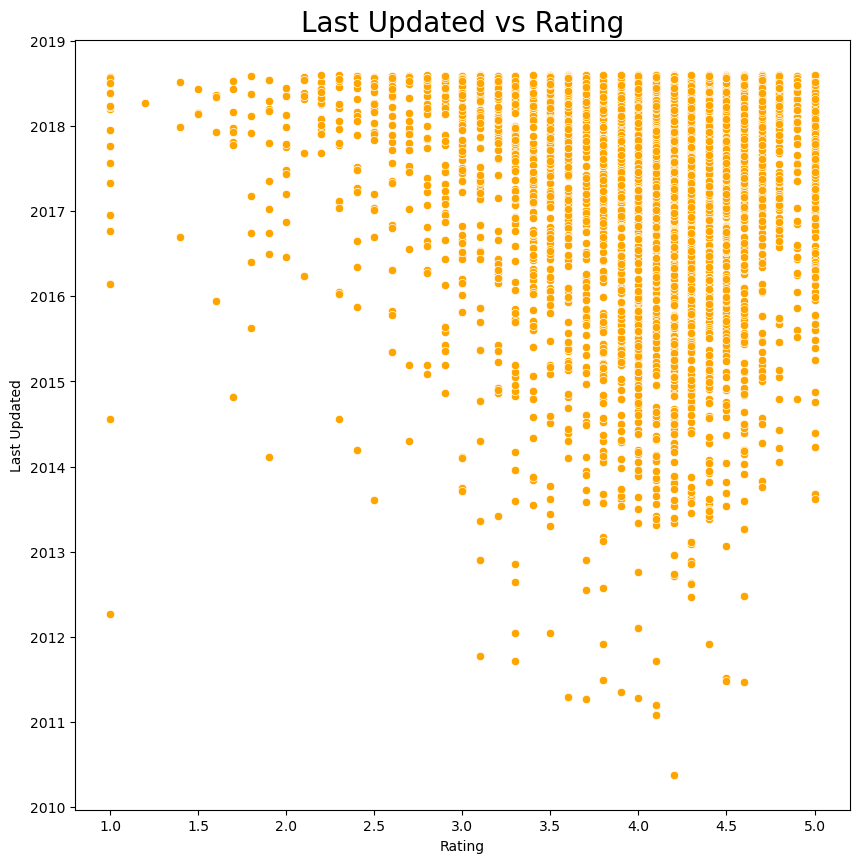

In [151]:
plt.figure(figsize=(10,10))
sns.scatterplot(y='Last Updated',x='Rating', color='orange',data=data)
plt.title('Last Updated vs Rating', size=20)
# Bu Qrafikdə tətbiqlərin son yeniləmə tarixi ilə reytinq arasındaki əlaqə göstərilib. Qrafikdə göstərir ki, son dəfə çox
# keçmiş tarixlərdə yenilənən proqramların reytinqi aşağıdır.